In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
file = "C:/Users/ASUS/Documents/IPYNB/RTSM'/AIQ.CSV"
df = pd.read_csv(file)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Aizawl,2020-03-11,32.69,47.91,6.99,2.85,11.93,26.64,0.60,4.53,4.48,0.03,0.30,NaN,NaN,NaN
1,Aizawl,2020-03-12,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,0.01,0.08,NaN,52.0,Satisfactory
2,Aizawl,2020-03-13,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,0.00,0.00,NaN,60.0,Satisfactory
3,Aizawl,2020-03-14,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,0.00,0.00,NaN,62.0,Satisfactory
4,Aizawl,2020-03-15,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,0.00,0.00,NaN,70.0,Satisfactory


In [2]:
df1=df.drop(['NH3','NOx','PM10','Benzene','Toluene', 'Xylene','AQI_Bucket'],axis=1)
df1

,City,Date,PM2.5,NO,NO2,CO,SO2,O3,AQI
0,Aizawl,2020-03-11,32.69,6.99,2.85,0.60,4.53,4.48,NaN
1,Aizawl,2020-03-12,31.21,7.20,1.27,0.56,4.22,2.81,52.0
2,Aizawl,2020-03-13,38.39,7.19,0.91,0.57,4.46,0.18,60.0
3,Aizawl,2020-03-14,43.23,7.14,1.07,0.57,4.53,0.41,62.0
4,Aizawl,2020-03-15,33.82,7.09,0.36,0.48,4.63,0.30,70.0
...,...,...,...,...,...,...,...,...,...
8303,Shillong,2020-06-27,9.41,0.99,2.89,0.16,4.76,24.97,35.0
8304,Shillong,2020-06-28,13.55,1.07,3.10,0.17,5.00,34.91,53.0
8305,Shillong,2020-06-29,9.53,1.07,3.05,0.18,5.33,10.85,26.0
8306,Shillong,2020-06-30,14.74,1.01,2.85,0.20,5.05,6.20,21.0


In [3]:
# Drop rows with NaN values
df1 = df1.dropna() 
df1 = df1.reset_index() # reset's row indexes in case any rows were dropped

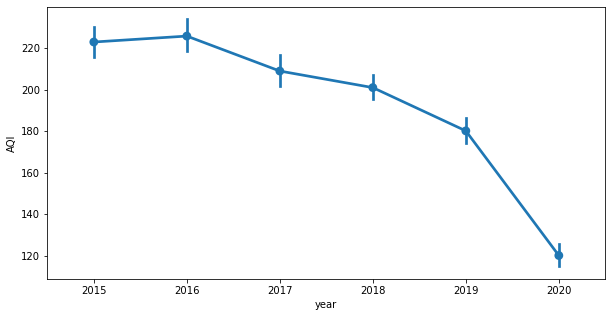

In [4]:
import matplotlib.pyplot as plt
df1['Date'] = pd.to_datetime(df1['Date'],format='%Y-%m-%d') # date parse
df1['year'] = df1['Date'].dt.year # year
df1['year'] = df1['year'].fillna(0.0).astype(int)
df1 = df1[(df1['year']>0)]

dff = df1[['AQI','year','City']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(10,5))
sns.pointplot(x='year', y='AQI', data=df1)

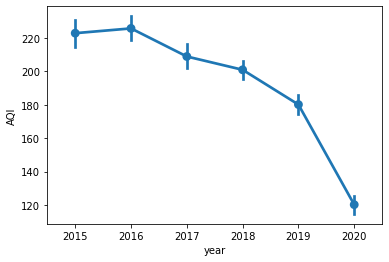

In [5]:
df1['Date'] = pd.to_datetime(df1['Date'],format='%Y-%m-%d') # date parse
df1['year'] = df1['Date'].dt.year # year

sns.pointplot(x='year', y='AQI', data=df1)

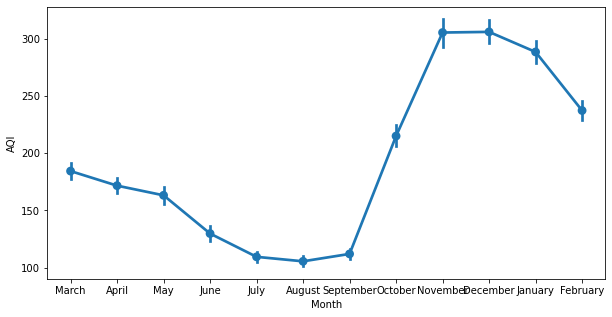

In [6]:
df1['Month'] = df1['Date'].dt.month_name() # week
f,ax=plt.subplots(figsize=(10,5))
sns.pointplot(x='Month', y='AQI', data=df1)

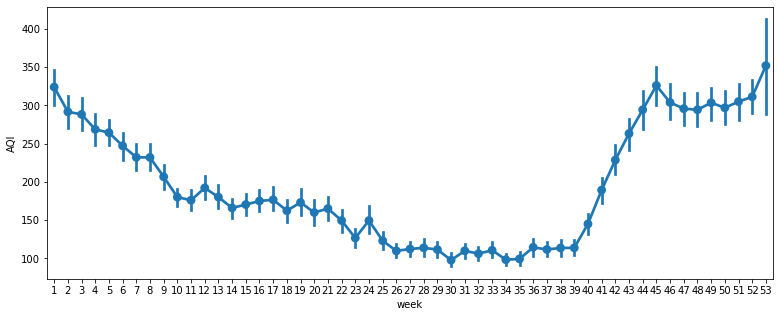

In [7]:
df1['week'] = df1['Date'].dt.week # week
f,ax=plt.subplots(figsize=(13,5))
sns.pointplot(x='week', y='AQI', data=df1)

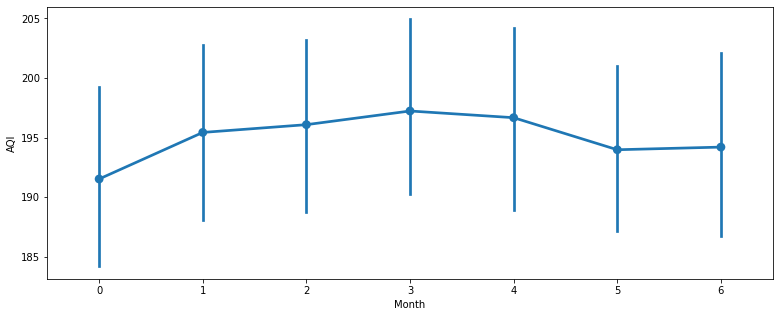

In [8]:
df1['Month'] = df1['Date'].dt.dayofweek # week
f,ax=plt.subplots(figsize=(13,5))
sns.pointplot(x='Month', y='AQI', data=df1)

Text(0.5, 0, 'Day of Year')

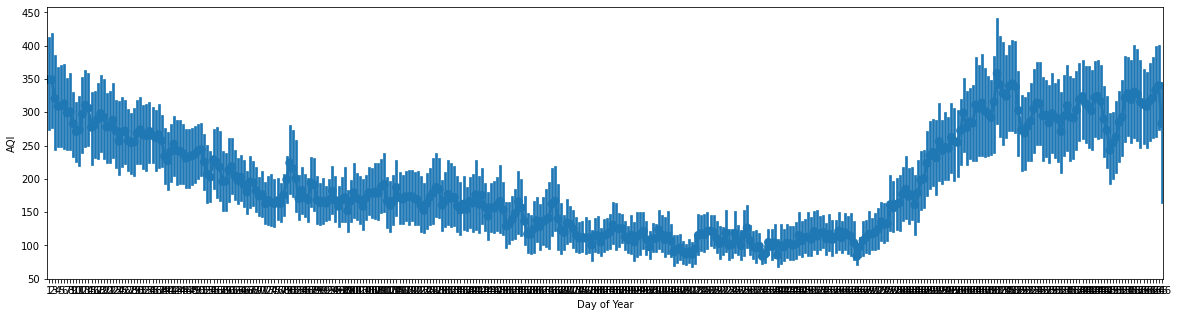

In [9]:
df1['Month'] = df1['Date'].dt.dayofyear # week
f,ax=plt.subplots(figsize=(20,5))
sns.pointplot(x='Month', y='AQI', data=df1)
plt.xlabel('Day of Year')

Text(0.5, 0, 'Quarter of Year')

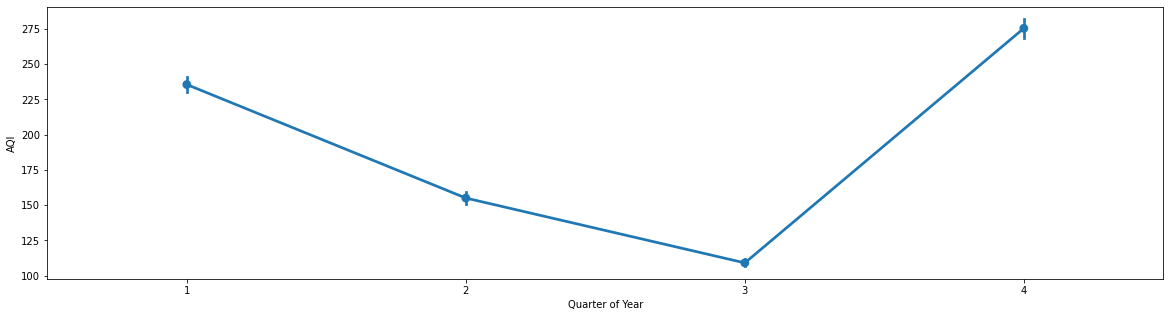

In [10]:
df1['Month'] = df1['Date'].dt.quarter # week
f,ax=plt.subplots(figsize=(20,5))
sns.pointplot(x='Month', y='AQI', data=df1)
plt.xlabel('Quarter of Year')

Text(0.5, 0, 'Day of Year')

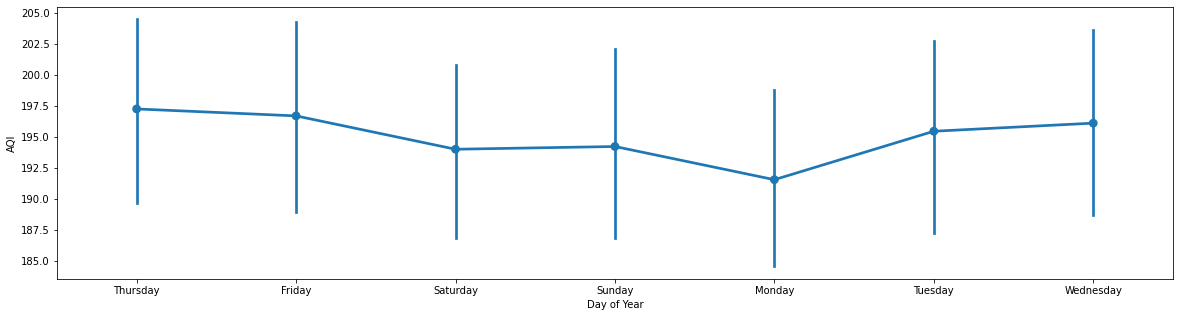

In [11]:
df1['Month'] = df1['Date'].dt.day_name() # week
f,ax=plt.subplots(figsize=(20,5))
sns.pointplot(x='Month', y='AQI', data=df1)
plt.xlabel('Day of Year')

Text(0.5, 0, 'Day of Year')

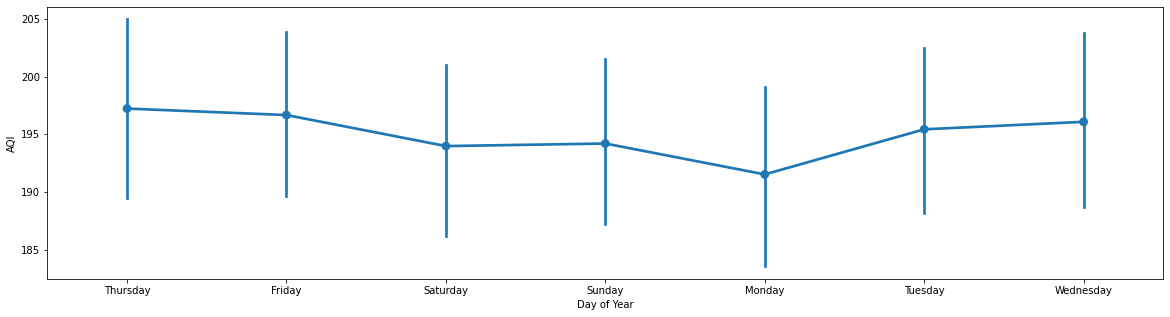

In [12]:
df1['Month'] = df1['Date'].dt.day_name() # week
f,ax=plt.subplots(figsize=(20,5))
sns.pointplot(x='Month', y='AQI', data=df1)
plt.xlabel('Day of Year')

In [13]:
cities=df1.groupby(['City'],as_index=False).mean()

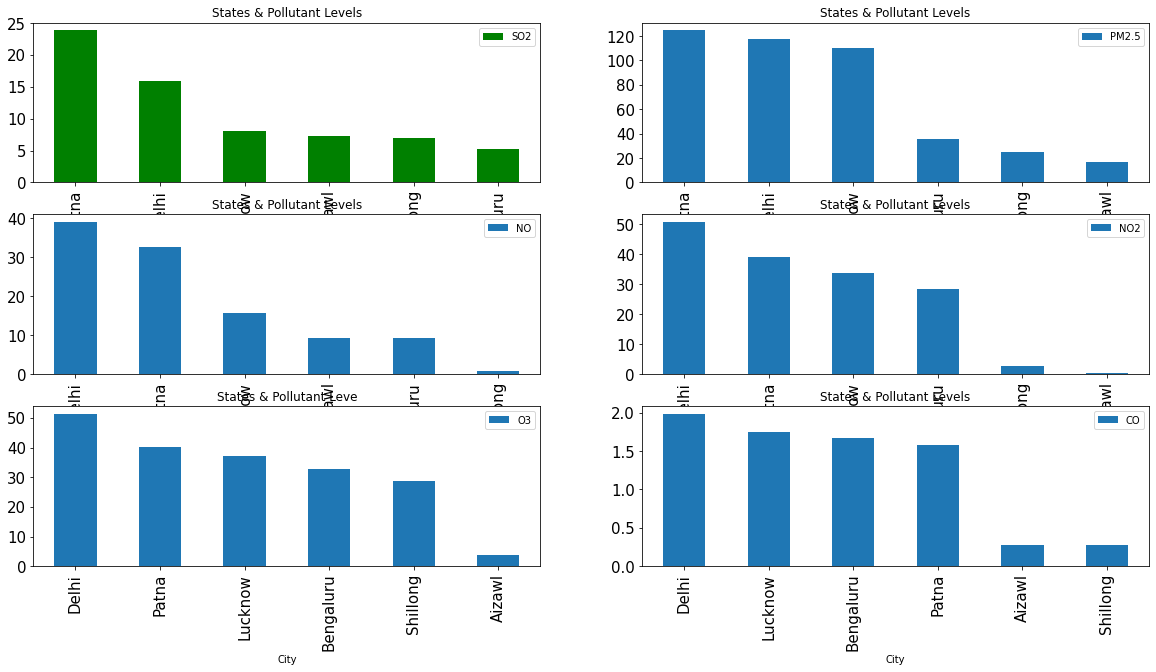

In [14]:
%matplotlib inline
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(40,40))
state_pollution = cities[['City','SO2']].groupby('City').mean()
state_pollution.reset_index(inplace = True)
state_pollution.sort_values('SO2', ascending= False, inplace = True)
state_pollution.plot(kind = 'bar', figsize= (20,10), x = 'City',  color='green', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[0][0])


state_pollution2 = cities[['City','PM2.5']].groupby('City').mean()
state_pollution2.reset_index(inplace = True)
state_pollution2.sort_values('PM2.5', ascending= False, inplace = True)
state_pollution2.plot(kind = 'bar', figsize= (20,10), x = 'City', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[0][1])

state_pollution2 = cities[['City','NO']].groupby('City').mean()
state_pollution2.reset_index(inplace = True)
state_pollution2.sort_values('NO', ascending= False, inplace = True)
state_pollution2.plot(kind = 'bar', figsize= (20,10), x = 'City', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[1][0])

state_pollution2 = cities[['City','NO2']].groupby('City').mean()
state_pollution2.reset_index(inplace = True)
state_pollution2.sort_values('NO2', ascending= False, inplace = True)
state_pollution2.plot(kind = 'bar', figsize= (20,10), x = 'City', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[1][1])

state_pollution2 = cities[['City','O3']].groupby('City').mean()
state_pollution2.reset_index(inplace = True)
state_pollution2.sort_values('O3', ascending= False, inplace = True)
state_pollution2.plot(kind = 'bar', figsize= (20,10), x = 'City', fontsize= 15, title = 'States & Pollutant Leve' ,ax=axes[2][0])

state_pollution2 = cities[['City','CO']].groupby('City').mean()
state_pollution2.reset_index(inplace = True)
state_pollution2.sort_values('CO', ascending= False, inplace = True)
state_pollution2.plot(kind = 'bar', figsize= (20,10), x = 'City', fontsize= 15, title = 'States & Pollutant Levels',ax=axes[2][1] )

In [15]:
df1.groupby('City')[['CO','NO','NO2','SO2','O3','PM2.5','AQI']].mean()

,CO,NO,NO2,SO2,O3,PM2.5,AQI
City,,,,,,,
Aizawl,0.281441,9.408378,0.367027,7.348288,3.716840,16.989820,34.765766
Bengaluru,1.670103,9.361434,28.308589,5.255769,32.858721,35.870136,94.318325
Delhi,1.985213,39.023525,50.763980,15.911535,51.335425,117.549593,259.487744
Lucknow,1.751708,15.687880,33.888832,8.024722,37.109856,109.793501,217.973059
Patna,1.585239,32.708475,39.105662,23.857637,40.142936,124.761697,240.782042
Shillong,0.271805,0.973197,2.875438,7.019122,28.744150,24.877414,53.795122


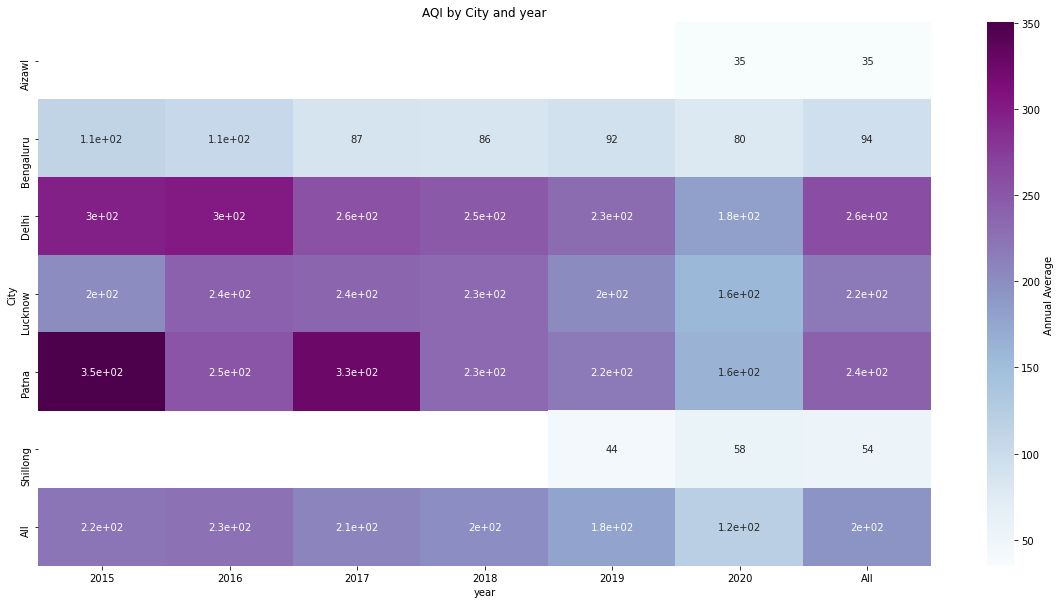

In [16]:
#Heatmap Pivot with State as Row, Year as Col, AQI as Value
df1['date'] = pd.to_datetime(df1['Date'],format='%Y-%m-%d') # date parse
df1['year'] = df1['Date'].dt.year # year
#df1['year'] = df1['year'].fillna(0.0).astype(int)
#dataset = dataset[(dataset['year']>0)]
f, ax = plt.subplots(figsize=(20,10))
ax.set_title('{} by City and year'.format('AQI'))
sns.heatmap(df1.pivot_table('AQI', index='City',
                columns=['year'],aggfunc='mean',margins=True),
                annot=True,cmap="BuPu", linewidths=0, ax=ax,cbar_kws={'label': 'Annual Average'})

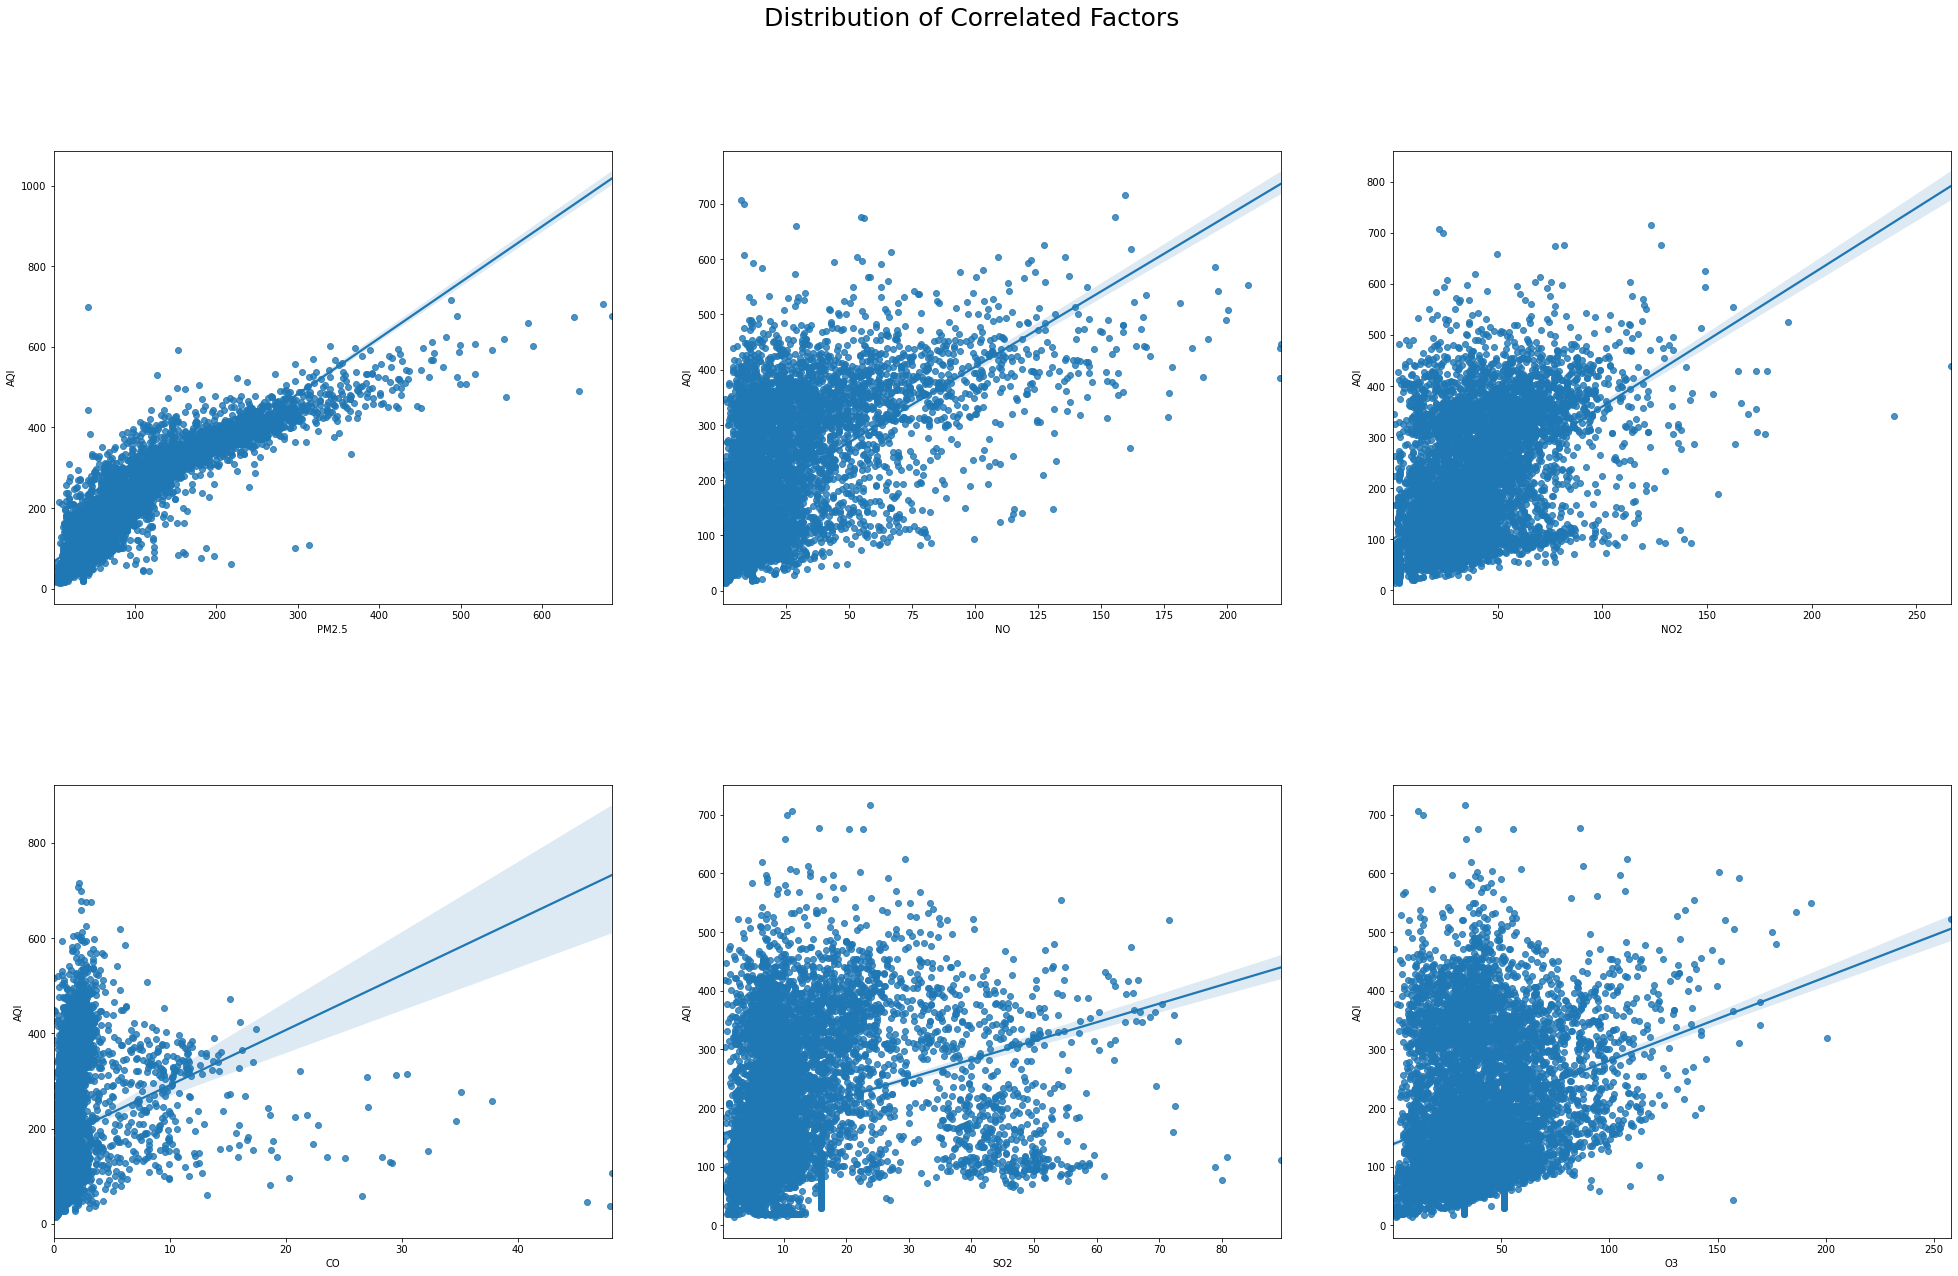

In [17]:
plt.rcParams['figure.figsize'] = (10, 7)
import warnings; warnings.simplefilter('ignore')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(34,20))
plt.subplots_adjust(hspace=0.4)

z = pd.Series()
for col in df1.columns.values[3:15]:
    if ((col!='AQI')&(col!='City')&(col!='year')&(col!='Month')&(col!='week')&(col!='month')&(col!='date')):
      
        colums=np.array(df1[col])
        z[col]=colums
#p=z.loc[z.index]

for i in range(2):
    for j in range(3):
        
        #x=z.index.values[i*3+j]
        #sns.barplot(z.index[i*3+j],z.values[i*3+j])
        #x=z.index.values[i*3+j]
        
        y_label=z.index[i*3+j]
        x_label=z[i*3+j]
        
        sns.regplot(data=df1, x=z.index[i*3+j], y='AQI',ax=axes[i,j])


fig.suptitle('Distribution of Correlated Factors', fontsize='25')
plt.show()

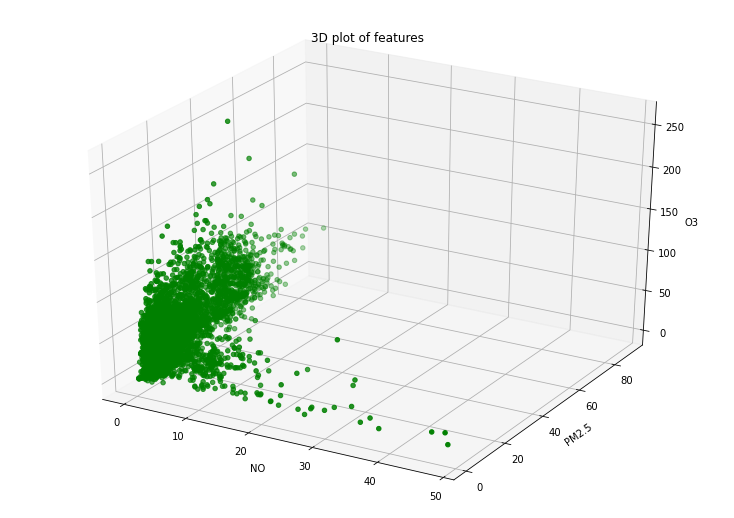

In [18]:
from mpl_toolkits.mplot3d import Axes3D
CO = df1['CO'].values
NO = df1['NO'].values
NO2 = df1['NO2'].values
SO2 = df1['SO2'].values
O3 = df1['O3'].values
PM25 = df1['PM2.5'].values
AQI = df1['AQI'].values
# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(CO, SO2, O3, color='green')
ax.set_xlabel('NO')
ax.set_ylabel('PM2.5')
ax.set_zlabel('O3')
ax.set_title(r'3D plot of features')
plt.show()
#CO	NO	NO2	SO2	O3	PM2.5	AQI

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

new_columns = {'PM2.5':'PM25'}
               
df1.rename(columns = new_columns, inplace=True)
X = np.array([NO,NO2,CO,SO2,O3,PM25]).T
Y = np.array(AQI)
# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)
print(rmse)
print(r2)

47.27982110403478
0.8566737052603923


In [20]:
from sklearn.metrics import r2_score
r2_score(Y,Y_pred)

0.8566737052603923

In [46]:
#adj_sample.columns.values
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(df1[["NO"]+["NO2"]+["CO"]+["SO2"]+["O3"]+["PM25"]], df1[["AQI"]])
predictions = lr.predict(df1[["NO"]+["NO2"]+["CO"]+["SO2"]+["O3"]+["PM25"]])

In [47]:
import statsmodels.formula.api as sm
model = sm.ols(formula='AQI ~ NO+NO2+SO2+O3+PM25', data=df1)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     8121.
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:49:08   Log-Likelihood:                -40318.
No. Observations:                7577   AIC:                         8.065e+04
Df Residuals:                    7571   BIC:                         8.069e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.2417      1.270     31.682      0.000      37.752      42.732
NO             0.2347      0.031      7.663      0.000       0.175       0.295
NO2            0.2766      0.033      8.438      0.000       0.212       0.341
SO2            0.2218      0.056      3.963      0.000       0.112       0.331
O3             0.4800      0.027     17.683      0.000       0.427       0.533
PM25           1.2707      0.009    145.043      0.000       1.254       1.288
==============================================================================
Omnibus:                     1258.596   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14750.743
Skew:                           0.430   Prob(JB):                         0.00
Kurtosis:                       9.781   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
x_trans=X.transpose()
xTx= x_trans*X

ValueError: operands could not be broadcast together with shapes (6,7577) (7577,6) 

In [52]:
X = np.array([NO2,CO,SO2,O3,PM25]).T
Y = np.array(NO)
# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)
print(rmse)
print(r2)

18.576385796925216
0.5232706557712639


In [53]:
X = np.array([NO,CO,SO2,O3,PM25]).T
Y = np.array(NO2)
# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)
print(rmse)
print(r2)

17.3487311747959
0.48664012794108547


In [54]:
X = np.array([NO,NO2,SO2,O3,PM25]).T
Y = np.array(CO)
# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)
print(rmse)
print(r2)

2.429201356710466
0.022570174936959675


In [55]:
X = np.array([NO,NO2,CO,O3,PM25]).T
Y = np.array(SO2)
# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)
print(rmse)
print(r2)

10.156825996045358
0.2421721071338796


In [56]:
X = np.array([NO,NO2,CO,SO2,PM25]).T
Y = np.array(O3)
# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)
print(rmse)
print(r2)

20.959381798469444
0.24176745630791852


In [57]:
X = np.array([NO,NO2,CO,SO2,O3]).T
Y = np.array(PM25)
# Model Intialization
reg = LinearRegression()
# Data Fitting
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)
# Model Evaluation
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = reg.score(X, Y)
print(rmse)
print(r2)

64.42755688098049
0.37846395472692795
